In [2]:
import os
os.chdir('../') # change directory to import out modules

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize

from data import config 
from data.data import Data 

In [51]:
data = Data()

LABEL_MAP = ['empty/overcrowded', 'all dead', 'all alive', '50/50']

In [52]:
def get_img_and_label(idx):
    img = np.load(f'{config.ROOT_PATH}/data/clean/img{idx}.npy')
    img = resize(img, (img.shape[0], config.IMG_SIZE[0], config.IMG_SIZE[1]), anti_aliasing=True, preserve_range=True)
    label = data[idx][1].item()
    return img, label

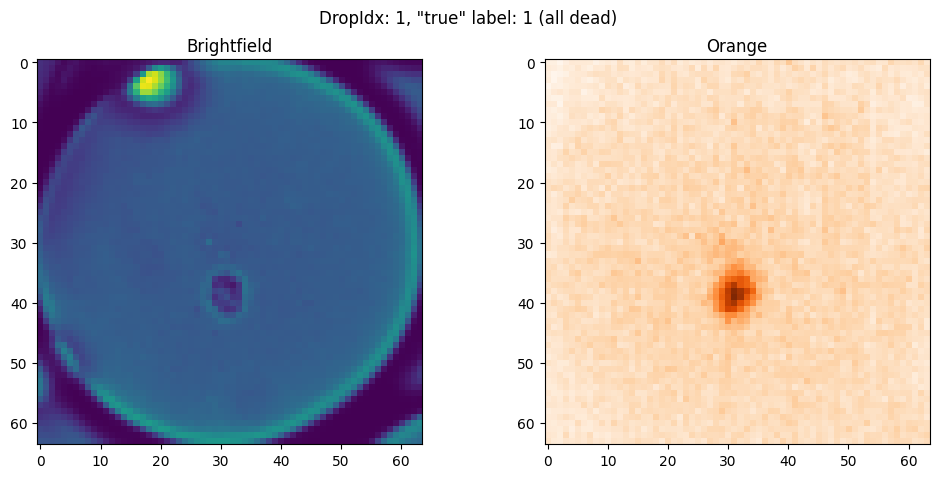

In [72]:
idx = 1
bf_channel = 3
orng_channel = 2


img, label = get_img_and_label(idx)
bf = img[bf_channel, ...]
orng = img[orng_channel, ...]

fig, ax = plt.subplots(1, 2, figsize=(12,5))
fig.suptitle(f'DropIdx: {idx}, "true" label: {label} ({LABEL_MAP[label]})')
ax[0].imshow(bf)
ax[0].set_title('Brightfield')
ax[1].imshow(orng, cmap='Oranges')
ax[1].set_title('Orange')
None

In [73]:
def min_max_norm(x, min=None, max=None, clip=True):
    if min is None:
        min = np.min(x)
    if max is None:
        max = np.max(x)
    x_norm = (x - min) / (max - min)
    if clip:
        x_norm = np.clip(x_norm, 0, 1)
    return x_norm

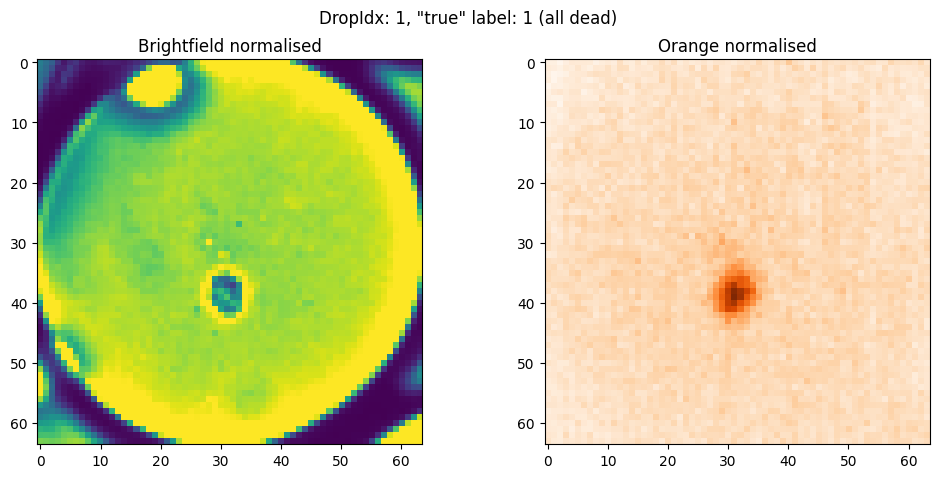

In [79]:
sample_idx = data.droplet_list[idx]['sample_idx']
norm_min = data.sample_list[sample_idx]['stats'][bf_channel]['min']
norm_max = data.sample_list[sample_idx]['stats'][bf_channel]['percentile']
bf_norm = min_max_norm(bf, norm_min, norm_max)
orng_norm = min_max_norm(orng)

fig, ax = plt.subplots(1, 2, figsize=(12,5))
fig.suptitle(f'DropIdx: {idx}, "true" label: {label} ({LABEL_MAP[label]})')
ax[0].imshow(bf_norm)
ax[0].set_title('Brightfield normalised')
ax[1].imshow(orng_norm, cmap='Oranges')
ax[1].set_title('Orange normalised')
None

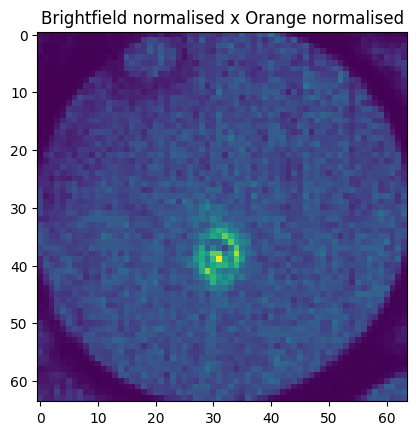

In [88]:
multi = bf_norm * orng_norm
plt.imshow(multi)
plt.title('Brightfield normalised x Orange normalised')
None

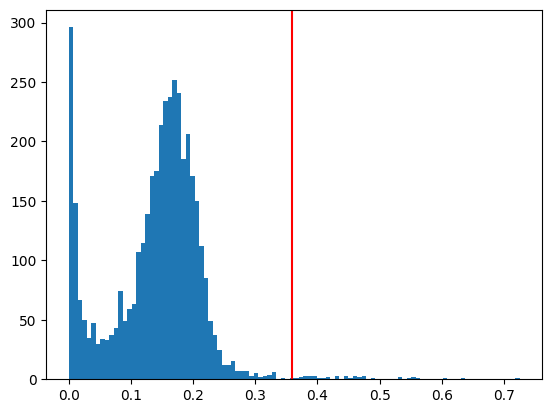

In [90]:
multi_flat = multi.flatten()
perc = np.percentile(multi_flat, 99)
plt.hist(multi_flat, bins=100)
plt.axvline(perc, color='red')
None

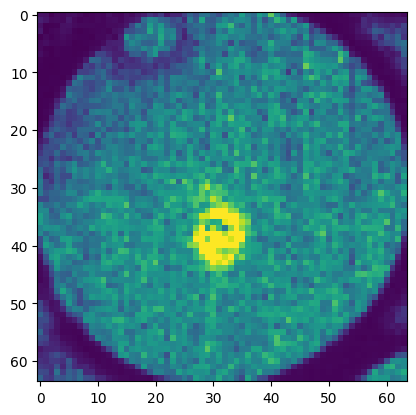

In [91]:
multi_norm = min_max_norm(multi, max=perc)
plt.imshow(multi_norm)
None

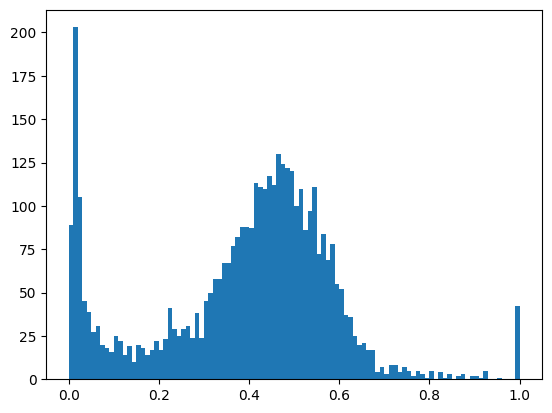

In [92]:
plt.hist(multi_norm.flatten(), bins=100)
None

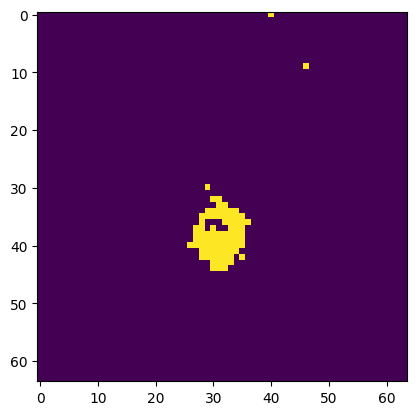

In [96]:
perc_norm = np.percentile(multi_norm, 98)
multi_bin = 1*(multi_norm > perc_norm)
plt.imshow(multi_bin)